# **PROYECTO N° 05**

PROGRAMA CIENCIA DE DATOS Y MACHINE LEARNING CON PYTHON

Instructor: Ing. Yaneth Ccahuantico

Alumno: Chumpitaz Cruzado Luis Felipe

video del proyecto:

repositorio GitHub https://github.com/lchumpitazc/PROGRAMA-CIENCIA-DE-DATOS-Y-MACHINE-LEARNING-CON-PYTHON.git

In [1]:
#importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import plotly.express as px
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from collections import  Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#cargamos la data
from google.colab import files
files.upload()
df=pd.read_csv('chocolate_ratings.csv',sep=",")
df.head()

Saving chocolate_ratings.csv to chocolate_ratings (1).csv


,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2530 non-null   int64  
 1   Company (Manufacturer)            2530 non-null   object 
 2   Company Location                  2530 non-null   object 
 3   Review Date                       2530 non-null   int64  
 4   Country of Bean Origin            2530 non-null   object 
 5   Specific Bean Origin or Bar Name  2530 non-null   object 
 6   Cocoa Percent                     2530 non-null   object 
 7   Ingredients                       2443 non-null   object 
 8   Most Memorable Characteristics    2530 non-null   object 
 9   Rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 197.8+ KB


In [4]:
df.shape

(2530, 10)

In [5]:
df.isnull().sum()

REF                                  0
Company (Manufacturer)               0
Company Location                     0
Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Ingredients                         87
Most Memorable Characteristics       0
Rating                               0
dtype: int64

Dado que usaremos los ingredientes como un parámetro para el entrenamiento, eliminaremos aquellos en los que sean faltantes

In [6]:
df.dropna(subset=["Ingredients"],inplace=True)

Verificamos la existencia de datos nulos

In [7]:
print(df.isnull().sum())
df.reset_index(drop=True, inplace=True)
print(df.shape)
df.head()

REF                                 0
Company (Manufacturer)              0
Company Location                    0
Review Date                         0
Country of Bean Origin              0
Specific Bean Origin or Bar Name    0
Cocoa Percent                       0
Ingredients                         0
Most Memorable Characteristics      0
Rating                              0
dtype: int64
(2443, 10)


,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


## **A. Análisis exploratorio de Datos (EDA)**

In [8]:
df.dtypes

REF                                   int64
Company (Manufacturer)               object
Company Location                     object
Review Date                           int64
Country of Bean Origin               object
Specific Bean Origin or Bar Name     object
Cocoa Percent                        object
Ingredients                          object
Most Memorable Characteristics       object
Rating                              float64
dtype: object

In [9]:
df.drop('REF', axis=1, inplace=True)
df.drop('Most Memorable Characteristics', axis=1, inplace=True)

In [10]:
df['Company (Manufacturer)'].unique()

array(['5150', 'A. Morin', 'Acalli', 'Adi aka Fijiana (Easy In Ltd)',
       'Aelan', 'Aequare (Gianduja)', 'Ah Cacao', "Akesson's (Pralus)",
       'Alain Ducasse', 'Alexandre', 'Altus aka Cao Artisan', 'Amano',
       'Amatller (Simon Coll)', 'Amazona', 'Ambrosia', 'Amedei', 'AMMA',
       'Anahata', 'Animas', 'Ara', 'Arete', 'Argencove',
       'Artisan du Chocolat', 'Artisan du Chocolat (Casa Luker)',
       'Aruntam', 'Askinosie', 'Atypic', 'Auro', 'Avanaa', 'Bahen & Co.',
       'Baiani', 'Bakau', 'Bankston', 'Bar Au Chocolat', "Baravelli's",
       'Batch', 'Bean', 'Beau Cacao', 'Beehive', 'Belcolade',
       'Bellflower', 'Belvie', 'Belyzium', 'Benns', 'Benoit Nihant',
       'Bernachon', 'Beschle (Felchlin)', 'Bisou', 'Bitacora',
       'Bittersweet Origins', 'Bixby', 'Black Mountain',
       'Black River (A. Morin)', 'Black Sheep', 'Blanxart',
       'Blue Bandana', 'Boho', 'Bonaterra', 'Bonnat',
       'Bouga Cacao (Tulicorp)', 'Brasstown',
       "Brasstown aka It's Chocola

In [11]:
#Eliminamos columna "Company (Manufacturer)"
df.drop('Company (Manufacturer)', axis=1, inplace=True)

In [12]:
#Eliminamos columna "Company Location"
df.drop('Company Location', axis=1, inplace=True)

In [13]:
uniqueCountryBeanOrigin=df['Country of Bean Origin'].unique()
print(uniqueCountryBeanOrigin)
print(len(uniqueCountryBeanOrigin))

['Tanzania' 'Dominican Republic' 'Madagascar' 'Fiji' 'Venezuela' 'Uganda'
 'India' 'Bolivia' 'Peru' 'Panama' 'Colombia' 'Burma' 'Brazil'
 'Papua New Guinea' 'Ecuador' 'Cuba' 'Togo' 'Sao Tome' 'Mexico' 'Vanuatu'
 'Indonesia' 'Trinidad' 'Vietnam' 'Nicaragua' 'Ghana' 'Belize' 'Blend'
 'Jamaica' 'Grenada' 'Guatemala' 'Honduras' 'Costa Rica' 'Haiti' 'Congo'
 'Philippines' 'Solomon Islands' 'Malaysia' 'Sri Lanka' 'Ivory Coast'
 'Gabon' 'Taiwan' 'Puerto Rico' 'Martinique' 'St. Lucia' 'Australia'
 'Liberia' 'Sierra Leone' 'Nigeria' 'U.S.A.' 'St.Vincent-Grenadines'
 'Thailand' 'Tobago' 'Sao Tome & Principe' 'Sumatra' 'El Salvador'
 'Cameroon' 'Samoa' 'China' 'Principe' 'Sulawesi' 'Suriname' 'DR Congo']
62


In [14]:
df.dtypes

Review Date                           int64
Country of Bean Origin               object
Specific Bean Origin or Bar Name     object
Cocoa Percent                        object
Ingredients                          object
Rating                              float64
dtype: object

In [15]:
#Transformamos la columna Country of Bean Origin en un tipo de dato entero
df['Country of Bean Origin Num']=df['Country of Bean Origin'].replace(uniqueCountryBeanOrigin,
                        np.arange(0,62), inplace=False)

In [16]:
df.tail(10)

,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Rating,Country of Bean Origin Num
2433,2012,Blend,Amazonas Frucht,65%,"4- B,S*,C,Sa",3.50,26
2434,2012,Peru,"Satipo Pangoa region, 20hr conche",70%,"4- B,S*,C,Sa",3.50,8
2435,2012,Blend,"Indianer, Raw",58%,"4- B,S*,C,Sa",3.50,26
2436,2012,Dominican Republic,"Loma Los Pinos, Yacao region, D.R.",62%,"4- B,S*,C,Sa",3.75,1
2437,2012,Dominican Republic,Santo Domingo,70%,"4- B,S*,C,Sa",3.75,1
2438,2014,Blend,Raw,80%,"4- B,S*,C,Sa",2.75,26
2439,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C",3.75,10
2440,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C",3.00,26
2441,2018,Congo,Mountains of the Moon,70%,"3- B,S,C",3.25,33
2442,2018,Belize,Maya Mtn,72%,"3- B,S,C",3.50,25


In [17]:
df['Country of Bean Origin Num']

0        0
1        1
2        2
3        3
4        4
        ..
2438    26
2439    10
2440    26
2441    33
2442    25
Name: Country of Bean Origin Num, Length: 2443, dtype: int64

In [18]:
#Observamos la cantidad de valores únicos de la columna  'Specific Bean Origin or Bar Name'
len(df['Specific Bean Origin or Bar Name'].unique())

1567

In [19]:
#Eliminamos columna Specific Bean Origin or Bar Name
df.drop('Specific Bean Origin or Bar Name', axis=1, inplace=True)

In [20]:
df.dtypes

Review Date                     int64
Country of Bean Origin         object
Cocoa Percent                  object
Ingredients                    object
Rating                        float64
Country of Bean Origin Num      int64
dtype: object

In [21]:
#Definimos una función para transformar de object a float
def p2f(x):
   return float(x.strip('%'))/100

In [22]:
#Transformamos la columna 'Cocoa Percent' a float
df["Cocoa Percent"] = df["Cocoa Percent"].apply(lambda x: p2f(x))

In [23]:
print(df.head())
print(df.dtypes)
df.tail(10)

   Review Date Country of Bean Origin  Cocoa Percent Ingredients  Rating  \
0         2019               Tanzania           0.76    3- B,S,C    3.25   
1         2019     Dominican Republic           0.76    3- B,S,C    3.50   
2         2019             Madagascar           0.76    3- B,S,C    3.75   
3         2021                   Fiji           0.68    3- B,S,C    3.00   
4         2021              Venezuela           0.72    3- B,S,C    3.00   

   Country of Bean Origin Num  
0                           0  
1                           1  
2                           2  
3                           3  
4                           4  
Review Date                     int64
Country of Bean Origin         object
Cocoa Percent                 float64
Ingredients                    object
Rating                        float64
Country of Bean Origin Num      int64
dtype: object


,Review Date,Country of Bean Origin,Cocoa Percent,Ingredients,Rating,Country of Bean Origin Num
2433,2012,Blend,0.65,"4- B,S*,C,Sa",3.50,26
2434,2012,Peru,0.70,"4- B,S*,C,Sa",3.50,8
2435,2012,Blend,0.58,"4- B,S*,C,Sa",3.50,26
2436,2012,Dominican Republic,0.62,"4- B,S*,C,Sa",3.75,1
2437,2012,Dominican Republic,0.70,"4- B,S*,C,Sa",3.75,1
2438,2014,Blend,0.80,"4- B,S*,C,Sa",2.75,26
2439,2017,Colombia,0.75,"3- B,S,C",3.75,10
2440,2018,Blend,0.75,"3- B,S,C",3.00,26
2441,2018,Congo,0.70,"3- B,S,C",3.25,33
2442,2018,Belize,0.72,"3- B,S,C",3.50,25


In [24]:
#Valores únicos en "Ingredients"
Ingred1=df['Ingredients'].unique()
print(Ingred1)

['3- B,S,C' '4- B,S,C,L' '2- B,S' '4- B,S,C,V' '5- B,S,C,V,L'
 '6-B,S,C,V,L,Sa' '5-B,S,C,V,Sa' '4- B,S,V,L' '2- B,S*' '1- B' '3- B,S*,C'
 '3- B,S,L' '3- B,S,V' '4- B,S*,C,L' '4- B,S*,C,Sa' '3- B,S*,Sa'
 '4- B,S,C,Sa' '4- B,S*,V,L' '2- B,C' '4- B,S*,C,V' '5- B,S,C,L,Sa']


In [25]:
#Eliminamos el número y los espacioe en "Ingredients"
df['Ingredients']=df['Ingredients'].apply(lambda x: x.replace(" ",""))
df['Ingredients']=df['Ingredients'].apply(lambda x: x[2:])

In [26]:
df.iloc[2440:2450][:]

,Review Date,Country of Bean Origin,Cocoa Percent,Ingredients,Rating,Country of Bean Origin Num
2440,2018,Blend,0.75,"B,S,C",3.00,26
2441,2018,Congo,0.70,"B,S,C",3.25,33
2442,2018,Belize,0.72,"B,S,C",3.50,25


In [27]:
#Valores únicos en "Ingredients"
df['Ingredients'].unique()

array(['B,S,C', 'B,S,C,L', 'B,S', 'B,S,C,V', 'B,S,C,V,L', 'B,S,C,V,L,Sa',
       'B,S,C,V,Sa', 'B,S,V,L', 'B,S*', 'B', 'B,S*,C', 'B,S,L', 'B,S,V',
       'B,S*,C,L', 'B,S*,C,Sa', 'B,S*,Sa', 'B,S,C,Sa', 'B,S*,V,L', 'B,C',
       'B,S*,C,V', 'B,S,C,L,Sa'], dtype=object)

Ingredientes :

B
S
C
L
V
Sa
S*

In [28]:
#Creamos columnas para cada variable nueva
df['ingr_B']=df['Country of Bean Origin Num'].copy()
df['ingr_S']=df['Country of Bean Origin Num'].copy()
df['ingr_C']=df['Country of Bean Origin Num'].copy()
df['ingr_L']=df['Country of Bean Origin Num'].copy()
df['ingr_V']=df['Country of Bean Origin Num'].copy()
df['ingr_Sa']=df['Country of Bean Origin Num'].copy()
df['ingr_S*']=df['Country of Bean Origin Num'].copy()

In [29]:
df.dtypes

Review Date                     int64
Country of Bean Origin         object
Cocoa Percent                 float64
Ingredients                    object
Rating                        float64
Country of Bean Origin Num      int64
ingr_B                          int64
ingr_S                          int64
ingr_C                          int64
ingr_L                          int64
ingr_V                          int64
ingr_Sa                         int64
ingr_S*                         int64
dtype: object

In [30]:
for formula in range(len(df['Ingredients'])):
  lista=df.iloc[formula][3].split(sep=',', maxsplit=-1)

  if  'B' in lista:
    df.at[formula, 'ingr_B']= 1
  else:
    df.at[formula, 'ingr_B']= 0

  if  'S' in lista:
    df.at[formula, 'ingr_S']= 1
  else:
    df.at[formula, 'ingr_S']= 0

  if  'C' in lista:
    df.at[formula, 'ingr_C']= 1
  else:
    df.at[formula, 'ingr_C']= 0

  if  'L' in lista:
    df.at[formula, 'ingr_L']= 1
  else:
    df.at[formula, 'ingr_L']= 0

  if  'V' in lista:
    df.at[formula, 'ingr_V']= 1
  else:
    df.at[formula, 'ingr_V']= 0

  if  'Sa' in lista:
    df.at[formula, 'ingr_Sa']= 1
  else:
    df.at[formula, 'ingr_Sa']= 0

  if  'S*' in lista:
    df.at[formula, 'ingr_S*']= 1
  else:
    df.at[formula, 'ingr_S*']= 0

In [31]:
df.tail(10)

,Review Date,Country of Bean Origin,Cocoa Percent,Ingredients,Rating,Country of Bean Origin Num,ingr_B,ingr_S,ingr_C,ingr_L,ingr_V,ingr_Sa,ingr_S*
2433,2012,Blend,0.65,"B,S*,C,Sa",3.50,26,1,0,1,0,0,1,1
2434,2012,Peru,0.70,"B,S*,C,Sa",3.50,8,1,0,1,0,0,1,1
2435,2012,Blend,0.58,"B,S*,C,Sa",3.50,26,1,0,1,0,0,1,1
2436,2012,Dominican Republic,0.62,"B,S*,C,Sa",3.75,1,1,0,1,0,0,1,1
2437,2012,Dominican Republic,0.70,"B,S*,C,Sa",3.75,1,1,0,1,0,0,1,1
2438,2014,Blend,0.80,"B,S*,C,Sa",2.75,26,1,0,1,0,0,1,1
2439,2017,Colombia,0.75,"B,S,C",3.75,10,1,1,1,0,0,0,0
2440,2018,Blend,0.75,"B,S,C",3.00,26,1,1,1,0,0,0,0
2441,2018,Congo,0.70,"B,S,C",3.25,33,1,1,1,0,0,0,0
2442,2018,Belize,0.72,"B,S,C",3.50,25,1,1,1,0,0,0,0


In [32]:
#Eliminamos la variable Ingredients
df.drop('Ingredients', axis=1, inplace=True)

In [33]:
numerical_columns =["Review Date","Cocoa Percent","Rating","Country of Bean Origin Num","ingr_B","ingr_S","ingr_C","ingr_L","ingr_V","ingr_Sa","ingr_S*"]
categorical_columns=["Country of Bean Origin"]

Forma del conjunto:  Review Date  : Counter({2015: 280, 2014: 243, 2018: 225, 2016: 213, 2019: 193, 2012: 180, 2013: 177, 2021: 175, 2011: 153, 2009: 113, 2017: 103, 2010: 94, 2008: 84, 2020: 81, 2007: 69, 2006: 60})
Forma del conjunto:  Cocoa Percent  : Counter({0.7: 1014, 0.75: 307, 0.72: 287, 0.8: 85, 0.65: 82, 0.68: 70, 0.74: 67, 0.73: 66, 0.6: 44, 0.71: 43, 0.77: 41, 0.85: 38, 0.76: 35, 0.67: 34, 0.64: 31, 0.66: 27, 0.78: 21, 0.82: 17, 0.62: 16, 0.55: 15, 0.69: 13, 0.63: 12, 0.9: 8, 0.58: 8, 0.88: 7, 1.0: 7, 0.61: 7, 0.81: 6, 0.83: 5, 0.725: 4, 0.84: 4, 0.91: 3, 0.735: 2, 0.79: 2, 0.715: 2, 0.56: 2, 0.89: 2, 0.5: 1, 0.86: 1, 0.42: 1, 0.605: 1, 0.57: 1, 0.46: 1, 0.99: 1, 0.53: 1, 0.87: 1})
Forma del conjunto:  Rating  : Counter({3.5: 552, 3.0: 506, 3.25: 453, 2.75: 320, 3.75: 295, 2.5: 156, 4.0: 111, 2.0: 29, 2.25: 14, 1.5: 5, 1.75: 1, 1.0: 1})
Forma del conjunto:  Country of Bean Origin Num  : Counter({4: 246, 8: 231, 1: 220, 14: 201, 2: 171, 26: 144, 23: 100, 7: 79, 0: 78, 10: 78

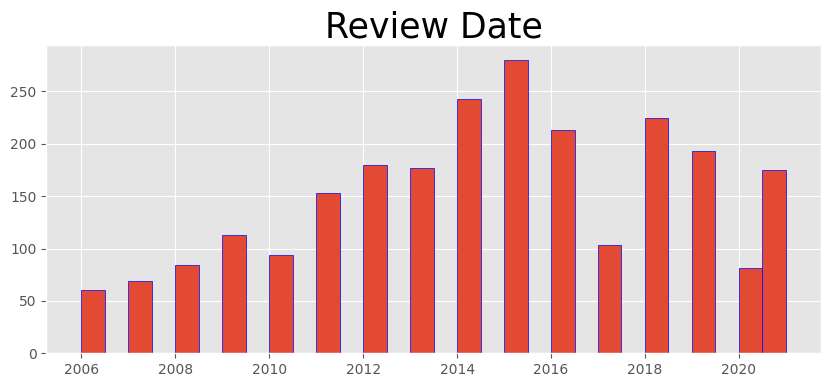

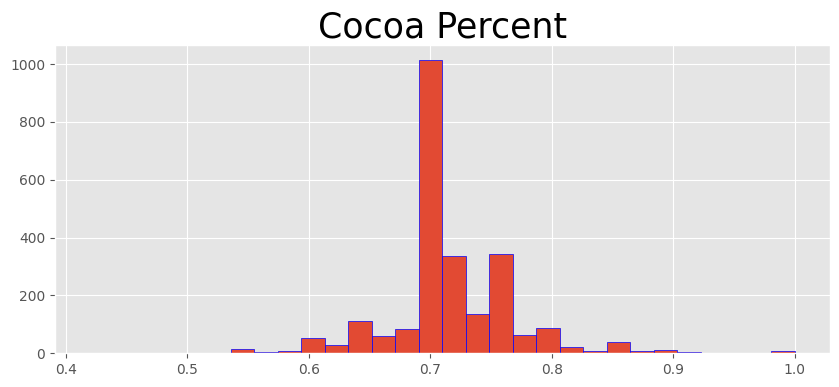

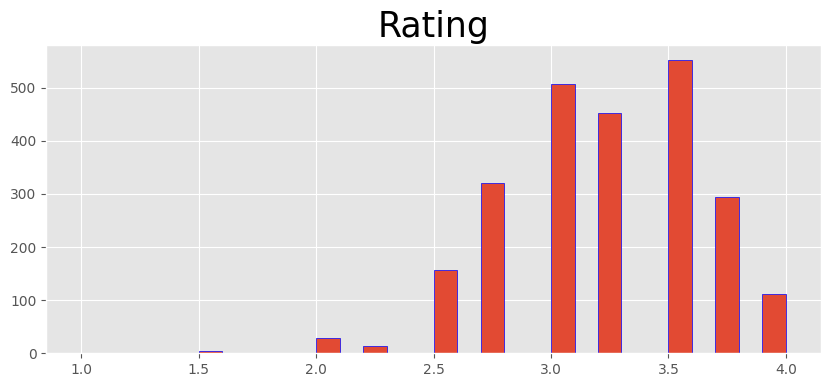

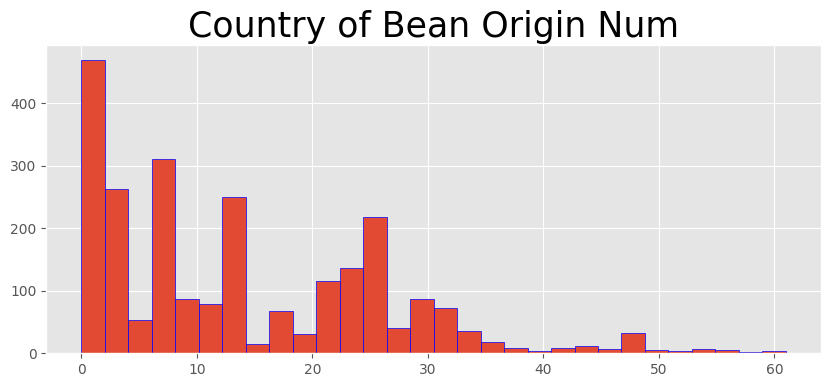

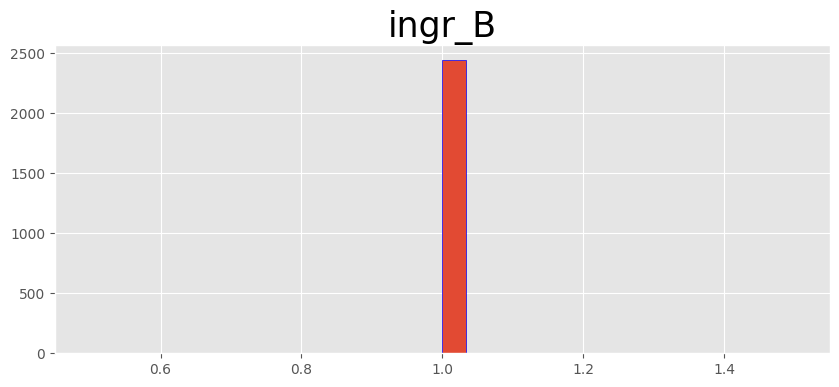

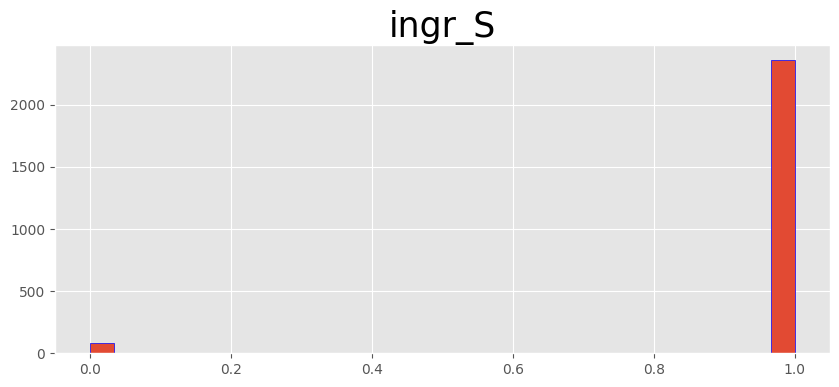

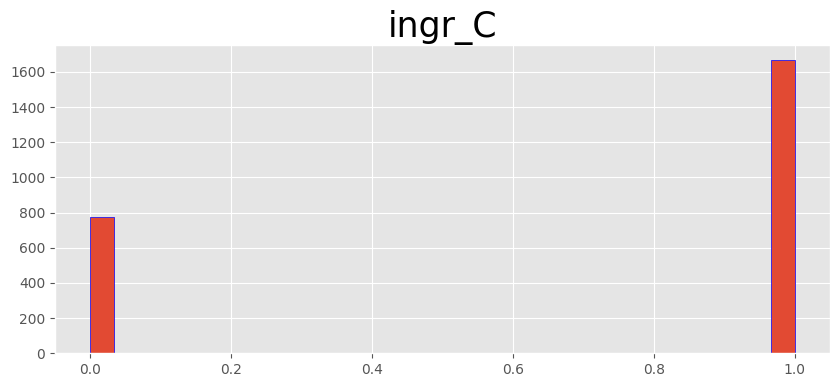

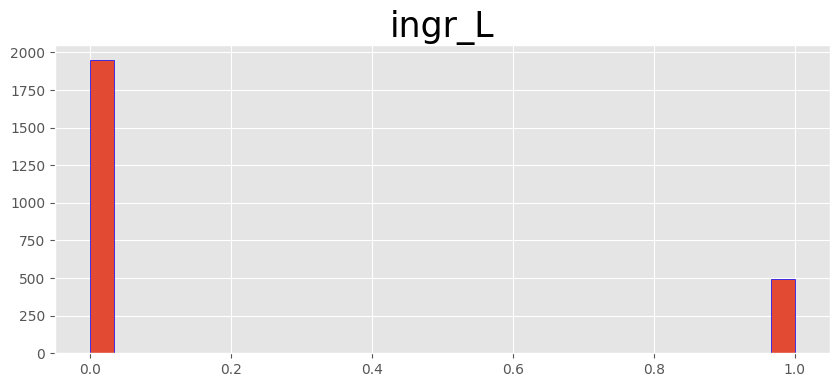

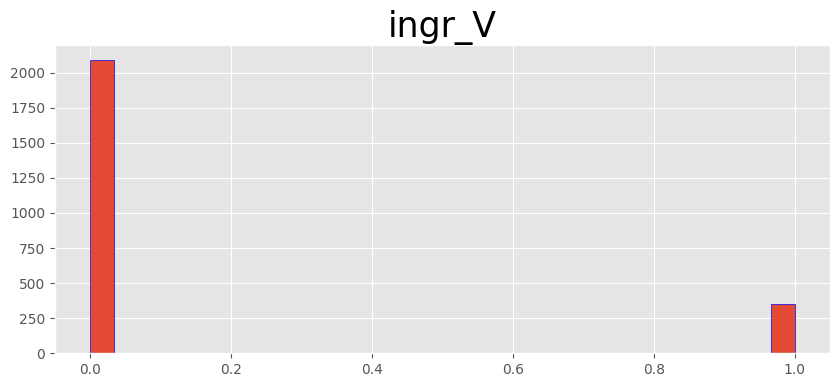

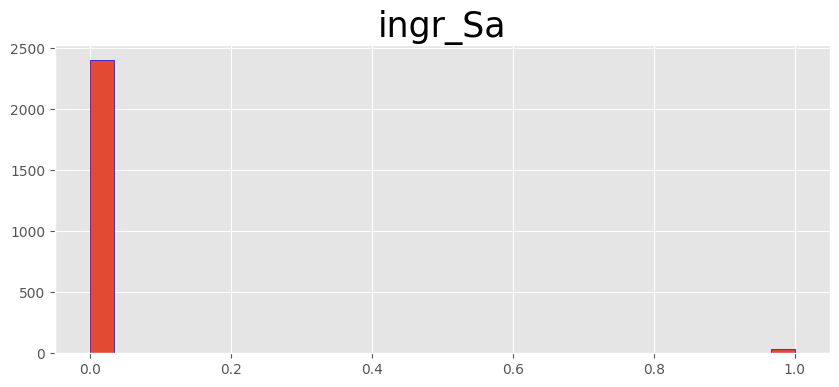

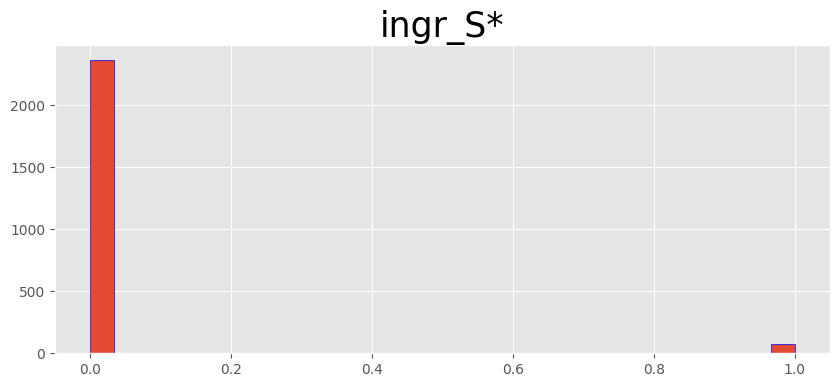

In [34]:
# This function plots a histogram
def desc_num_feature(numerical_features):
  feature_name=numerical_features
  fig, ax = plt.subplots(figsize=(10,4))
  df[feature_name].hist(bins=30, edgecolor="b")
  ax.set_title(feature_name, size=25)
  df[feature_name].describe().round(2)
  print('Forma del conjunto: ',feature_name," :" ,Counter(df[feature_name]))
  # This loop will plot each of the numerical features using the previous function
for x in numerical_columns:
  desc_num_feature(x)

In [35]:
#Ya que todas las recetas cuentan con el ingrediente B, se procederá a eliminarlo
df.drop("ingr_B", axis=1, inplace=True)
numerical_columns =["Review Date","Cocoa Percent","Rating","Country of Bean Origin Num","ingr_S","ingr_C","ingr_L","ingr_V","ingr_Sa","ingr_S*"]
categorical_columns=["Country of Bean Origin"]

                    count  percent
Venezuela             246     10.1
Peru                  231      9.5
Dominican Republic    220      9.0
Ecuador               201      8.2
Madagascar            171      7.0
...                   ...      ...
China                   1      0.0
Principe                1      0.0
Sulawesi                1      0.0
Suriname                1      0.0
DR Congo                1      0.0

[62 rows x 2 columns]


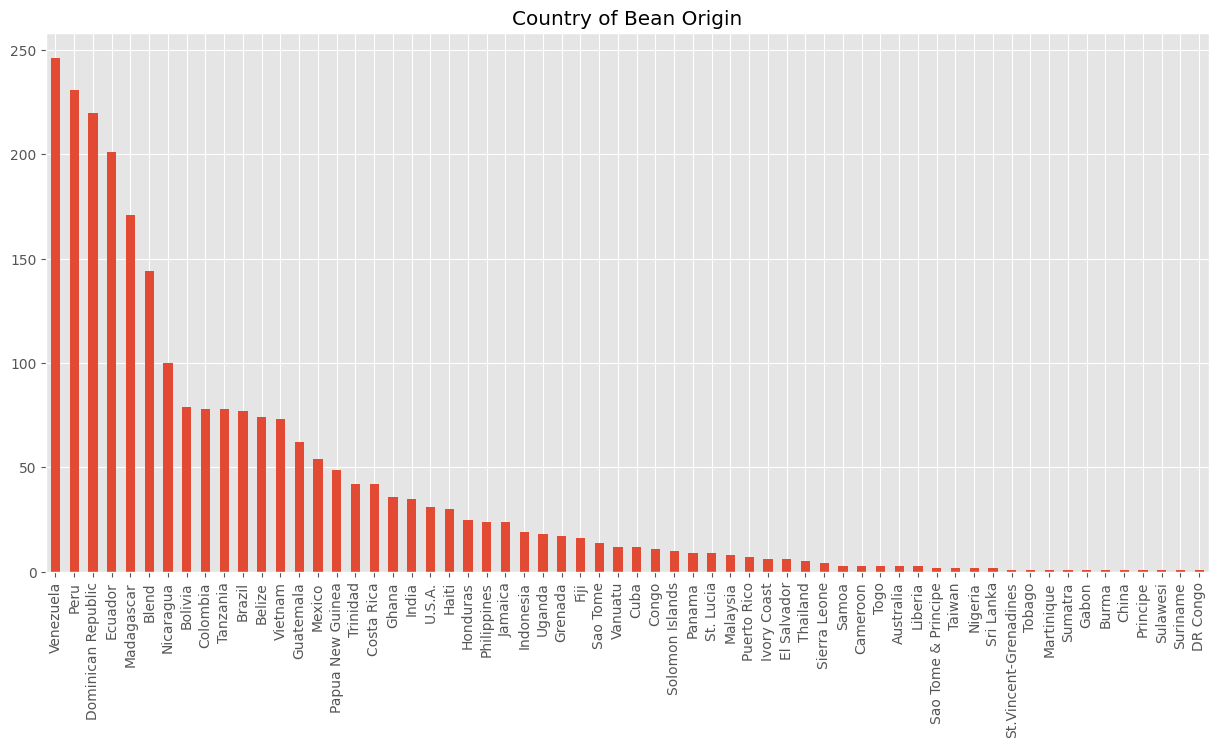

In [36]:
plt.figure(figsize=(15, 7))
feature = categorical_columns[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df0 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df0)
count.plot(kind='bar', title=feature, );

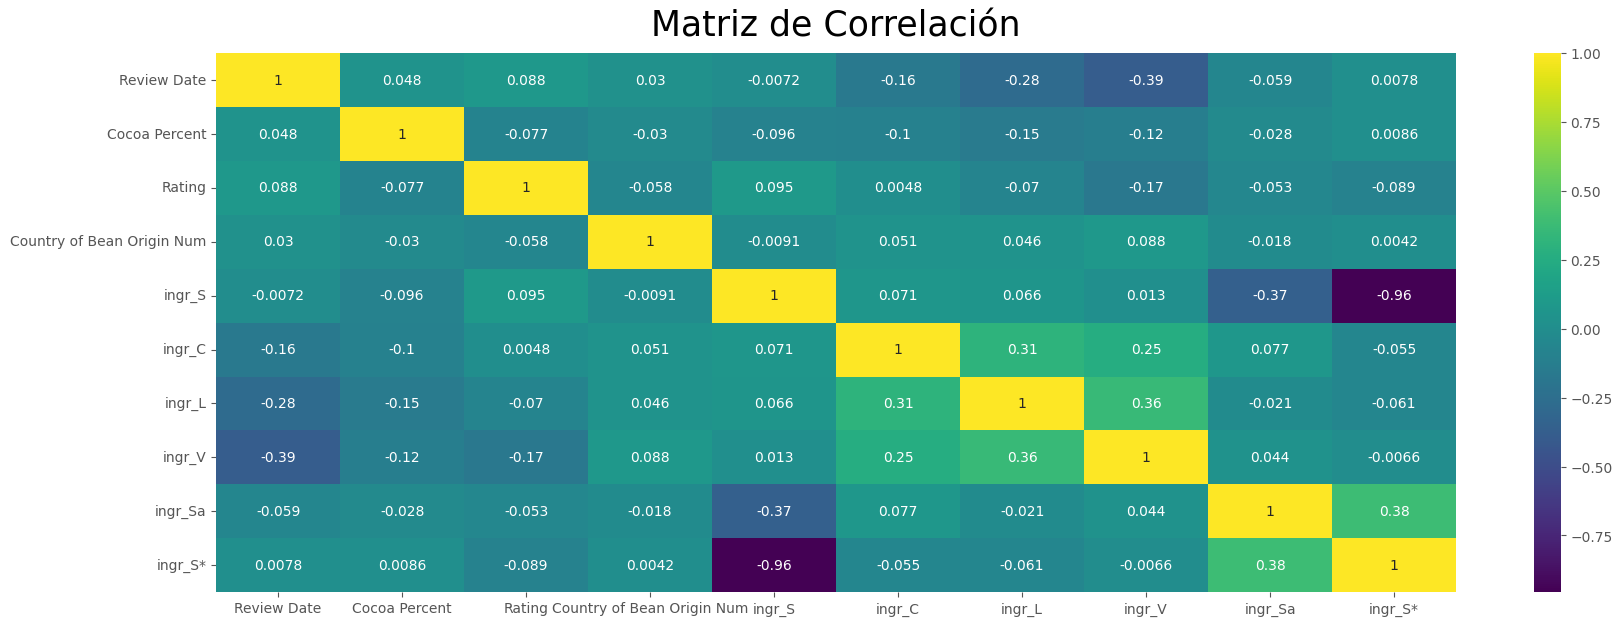

In [37]:
# Matriz de correlación
plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(df.corr(),cmap='viridis',annot=True)

heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12);

Realizaremos la técnica oversampling para ingr_Sa

In [38]:
ros=RandomOverSampler(sampling_strategy=1)

X2=df.drop(["Country of Bean Origin"], axis = 1, inplace=False)
X2=X2.drop(["ingr_Sa"], axis = 1)
y2=df["ingr_Sa"]
x2_ros, y2_ros= ros.fit_resample(X2,y2)

In [39]:
y2_ros

0       0
1       0
2       0
3       0
4       0
       ..
4807    1
4808    1
4809    1
4810    1
4811    1
Name: ingr_Sa, Length: 4812, dtype: int64

In [40]:
print('Forma del conjunto de datos con Resample ', Counter(y2_ros))

Forma del conjunto de datos con Resample  Counter({0: 2406, 1: 2406})


In [41]:
df2_ros=x2_ros.join(y2_ros)
df2_ros

,Review Date,Cocoa Percent,Rating,Country of Bean Origin Num,ingr_S,ingr_C,ingr_L,ingr_V,ingr_S*,ingr_Sa
0,2019,0.76,3.25,0,1,1,0,0,0,0
1,2019,0.76,3.50,1,1,1,0,0,0,0
2,2019,0.76,3.75,2,1,1,0,0,0,0
3,2021,0.68,3.00,3,1,1,0,0,0,0
4,2021,0.72,3.00,4,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4807,2011,0.60,3.25,12,1,1,0,0,0,1
4808,2012,0.75,3.00,14,0,1,0,0,1,1
4809,2012,0.65,3.50,26,0,1,0,0,1,1
4810,2012,0.90,3.25,7,0,1,0,0,1,1


Forma del conjunto:  Review Date  : Counter({2012: 1036, 2014: 749, 2011: 706, 2013: 381, 2016: 332, 2015: 280, 2018: 225, 2019: 193, 2021: 175, 2017: 170, 2010: 158, 2009: 113, 2008: 84, 2020: 81, 2007: 69, 2006: 60})
Forma del conjunto:  Cocoa Percent  : Counter({0.7: 1391, 0.75: 742, 0.65: 514, 0.72: 345, 0.8: 274, 0.725: 264, 0.68: 205, 0.62: 134, 0.6: 126, 0.66: 107, 0.67: 103, 0.58: 82, 0.9: 68, 0.74: 67, 0.73: 66, 0.71: 43, 0.77: 41, 0.85: 38, 0.76: 35, 0.64: 31, 0.78: 21, 0.82: 17, 0.55: 15, 0.69: 13, 0.63: 12, 0.88: 7, 1.0: 7, 0.61: 7, 0.81: 6, 0.83: 5, 0.84: 4, 0.91: 3, 0.735: 2, 0.79: 2, 0.715: 2, 0.56: 2, 0.89: 2, 0.5: 1, 0.86: 1, 0.42: 1, 0.605: 1, 0.57: 1, 0.46: 1, 0.99: 1, 0.53: 1, 0.87: 1})
Forma del conjunto:  Rating  : Counter({3.0: 1222, 3.5: 932, 3.25: 874, 2.75: 615, 3.75: 486, 2.5: 403, 4.0: 111, 2.0: 95, 1.5: 58, 2.25: 14, 1.75: 1, 1.0: 1})
Forma del conjunto:  Country of Bean Origin Num  : Counter({1: 677, 8: 425, 26: 392, 14: 335, 2: 300, 4: 246, 12: 223, 25: 2

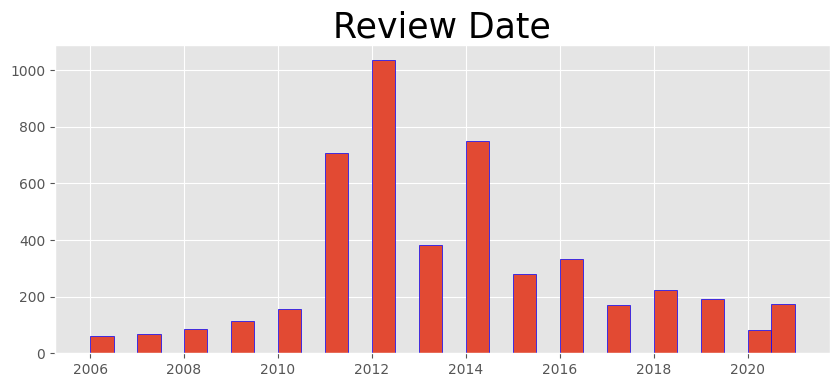

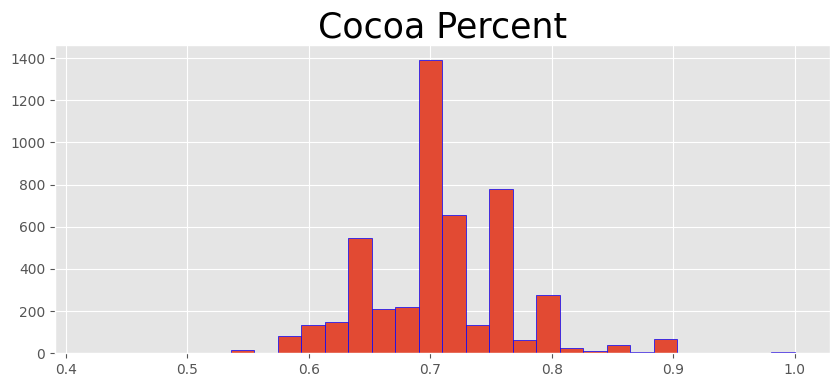

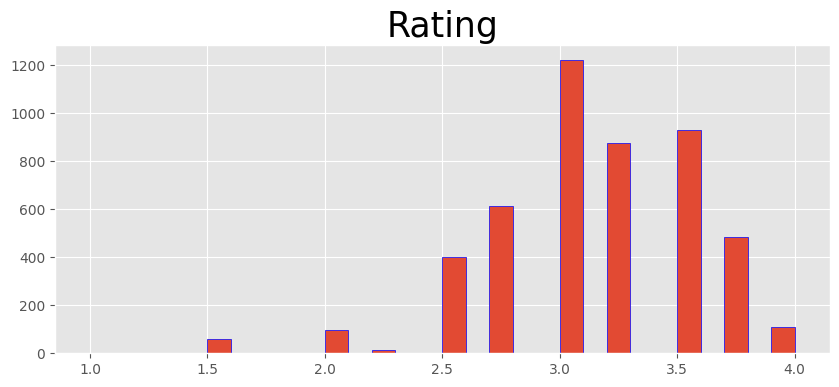

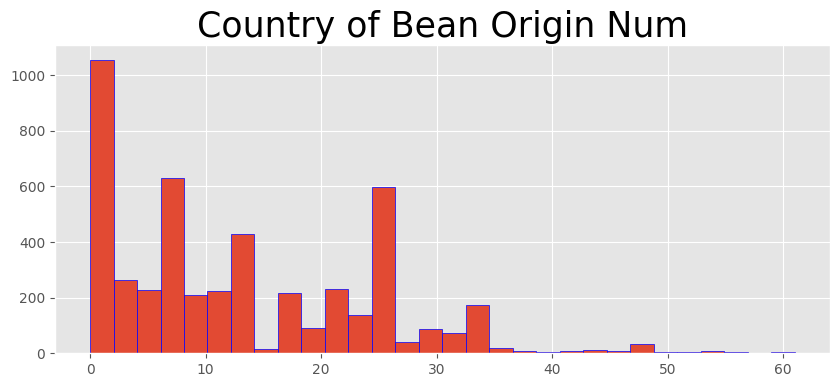

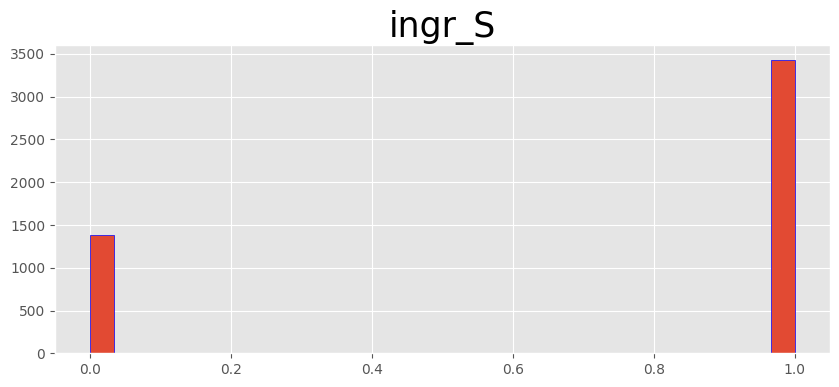

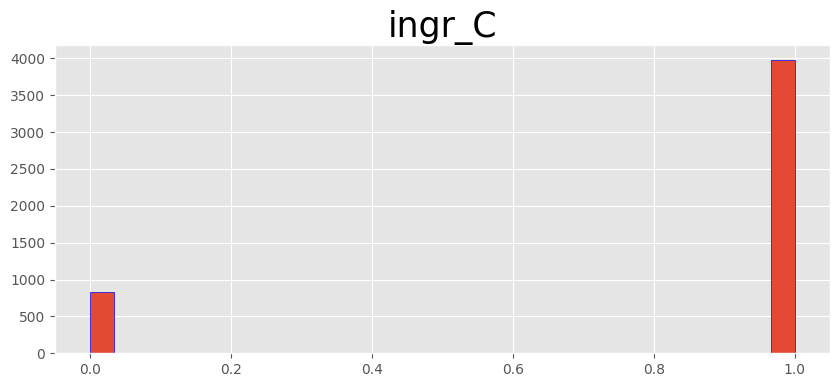

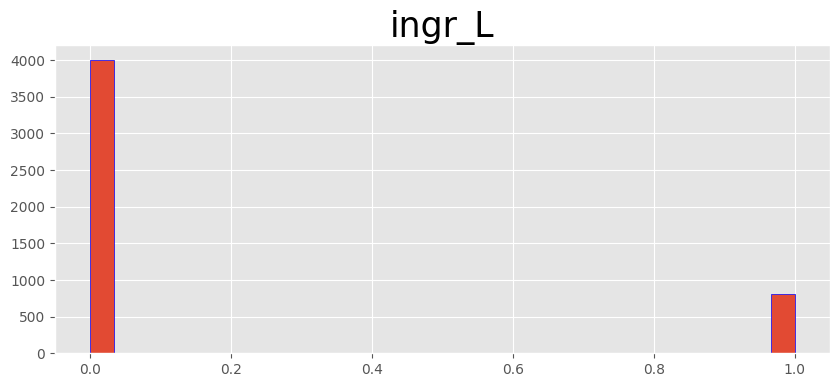

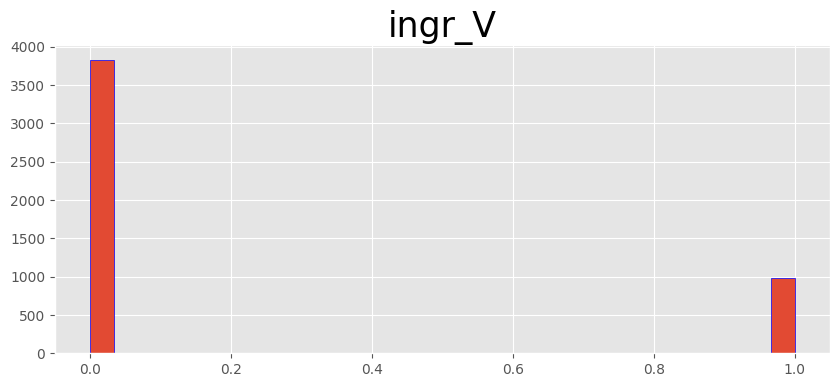

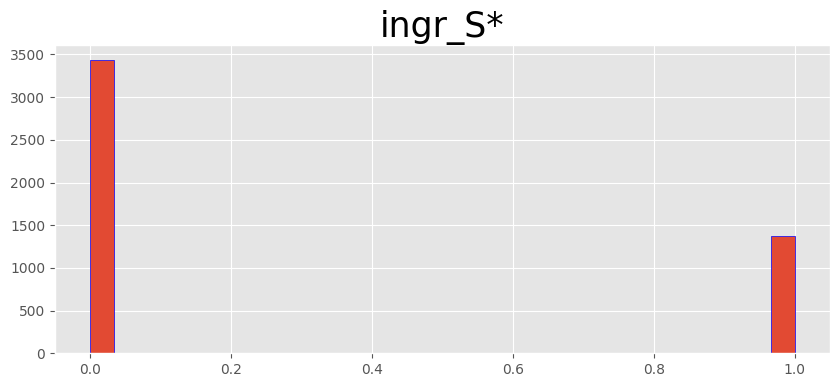

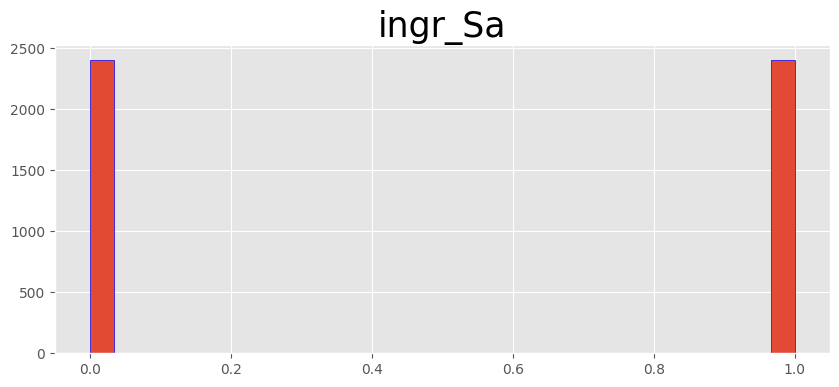

In [42]:
# This function plots a histogram
def desc_num_feature(numerical_features):
  feature_name=numerical_features
  fig, ax = plt.subplots(figsize=(10,4))
  df2_ros[feature_name].hist(bins=30, edgecolor="b")
  ax.set_title(feature_name, size=25)
  print('Forma del conjunto: ',feature_name," :" ,Counter(df2_ros[feature_name]))
  df[feature_name].describe().round(2)

  # This loop will plot each of the numerical features using the previous function
for x in df2_ros.columns:
  desc_num_feature(x)

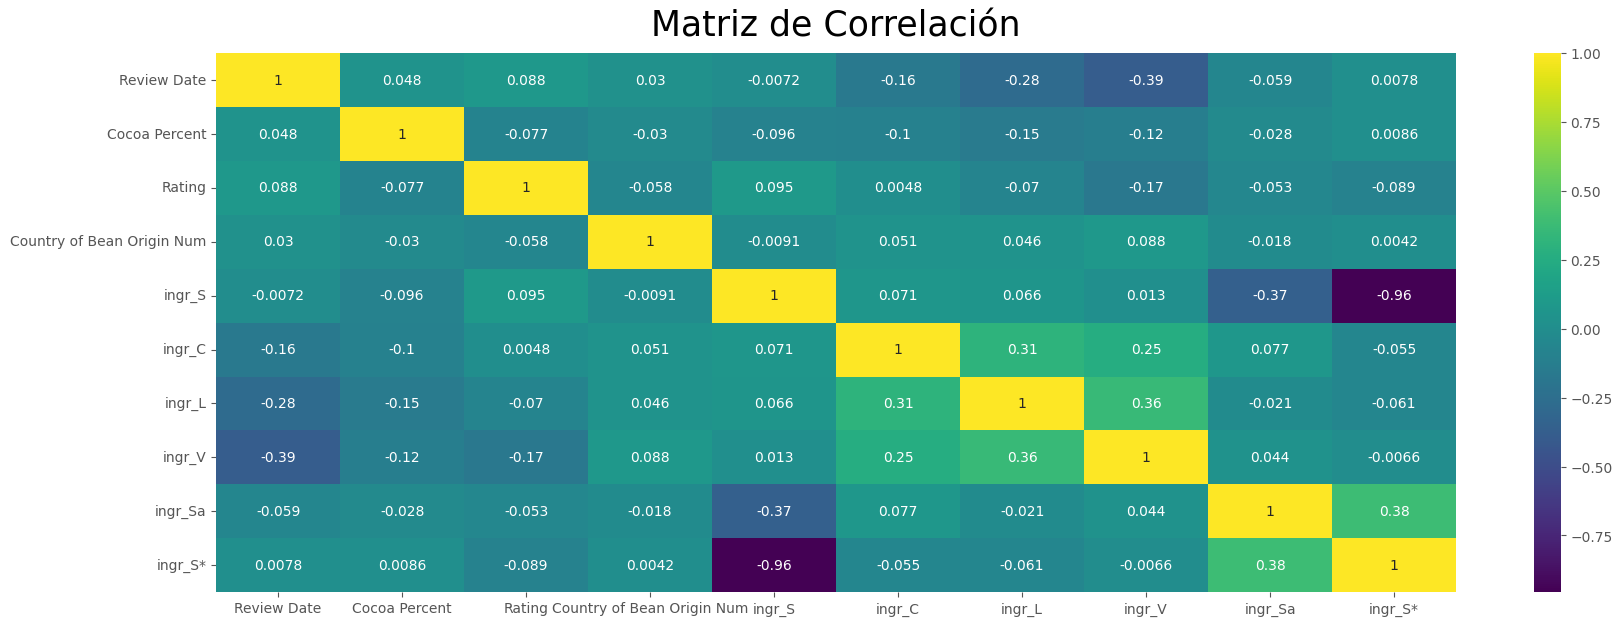

In [43]:
# Matriz de correlación
plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(df.corr(),cmap='viridis',annot=True)

heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12);

In [44]:
X3=df2_ros.drop(["ingr_L"], axis = 1)
y3=df2_ros["ingr_L"]
x3_ros, y3_ros= ros.fit_resample(X3,y3)

df3_ros=x3_ros.join(y3_ros)
df3_ros

,Review Date,Cocoa Percent,Rating,Country of Bean Origin Num,ingr_S,ingr_C,ingr_V,ingr_S*,ingr_Sa,ingr_L
0,2019,0.76,3.25,0,1,1,0,0,0,0
1,2019,0.76,3.50,1,1,1,0,0,0,0
2,2019,0.76,3.75,2,1,1,0,0,0,0
3,2021,0.68,3.00,3,1,1,0,0,0,0
4,2021,0.72,3.00,4,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7997,2016,0.61,2.50,6,1,1,0,0,0,1
7998,2013,0.66,3.00,1,1,1,0,0,1,1
7999,2016,0.70,2.75,1,1,1,1,0,1,1
8000,2014,0.65,2.75,21,1,1,1,0,1,1


Forma del conjunto:  Review Date  : Counter({2012: 1128, 2014: 1092, 2013: 886, 2016: 857, 2011: 810, 2017: 502, 2015: 417, 2018: 358, 2010: 344, 2019: 336, 2009: 289, 2008: 252, 2006: 233, 2021: 223, 2007: 183, 2020: 92})
Forma del conjunto:  Cocoa Percent  : Counter({0.7: 2140, 0.75: 1295, 0.65: 871, 0.8: 573, 0.72: 512, 0.66: 438, 0.68: 279, 0.725: 264, 0.6: 206, 0.62: 156, 0.67: 131, 0.71: 127, 0.58: 119, 0.64: 104, 0.73: 99, 0.74: 95, 0.85: 72, 0.77: 71, 0.9: 68, 0.55: 61, 0.76: 59, 0.78: 39, 0.63: 36, 0.82: 36, 0.61: 33, 0.69: 20, 0.88: 13, 0.5: 9, 0.91: 9, 0.56: 8, 1.0: 7, 0.605: 7, 0.84: 7, 0.53: 7, 0.81: 6, 0.83: 5, 0.46: 5, 0.42: 3, 0.735: 2, 0.79: 2, 0.715: 2, 0.89: 2, 0.86: 1, 0.57: 1, 0.99: 1, 0.87: 1})
Forma del conjunto:  Rating  : Counter({3.0: 1977, 3.5: 1595, 2.75: 1570, 3.25: 1141, 3.75: 688, 2.5: 549, 4.0: 217, 2.0: 176, 1.5: 65, 2.25: 17, 1.0: 6, 1.75: 1})
Forma del conjunto:  Country of Bean Origin Num  : Counter({1: 1535, 26: 652, 14: 573, 8: 570, 4: 472, 2: 442,

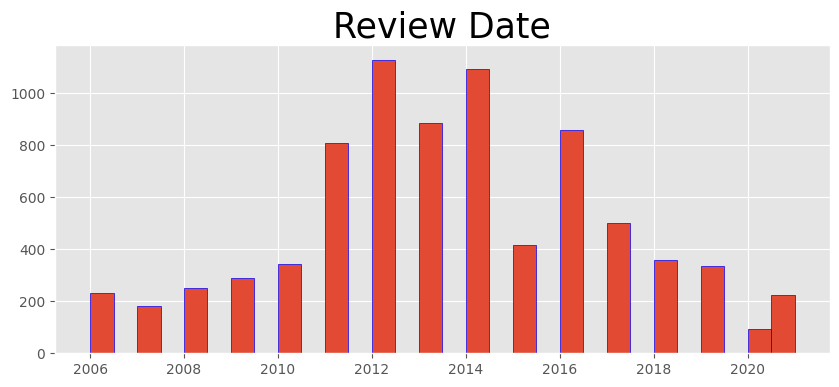

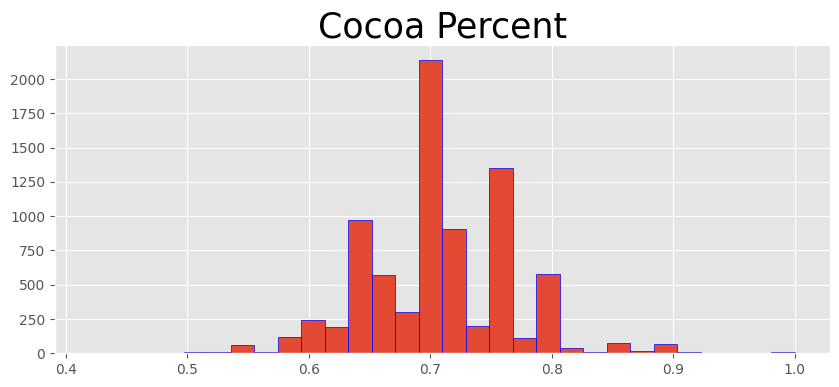

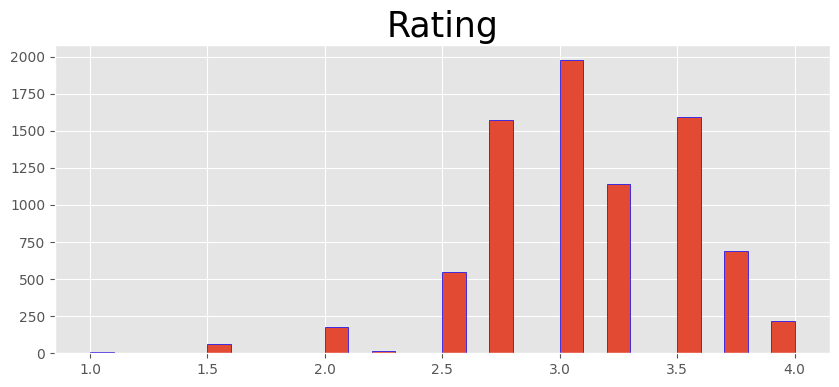

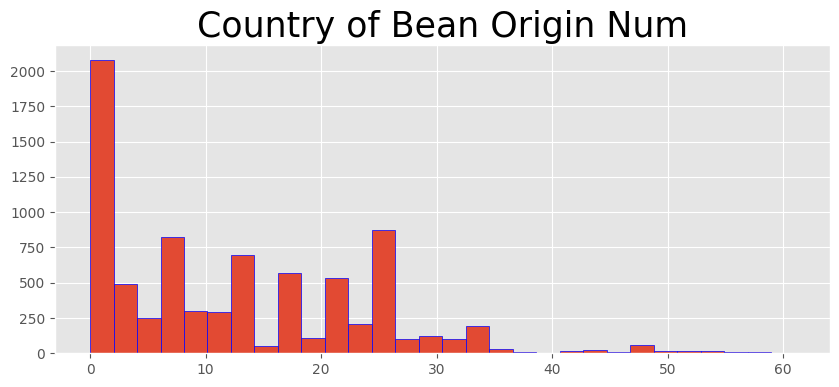

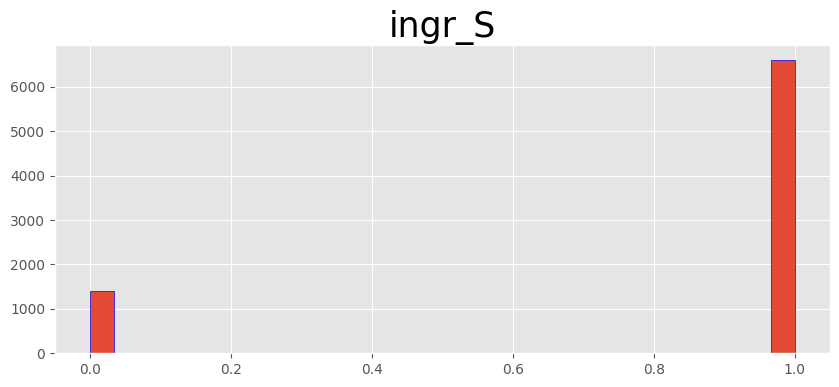

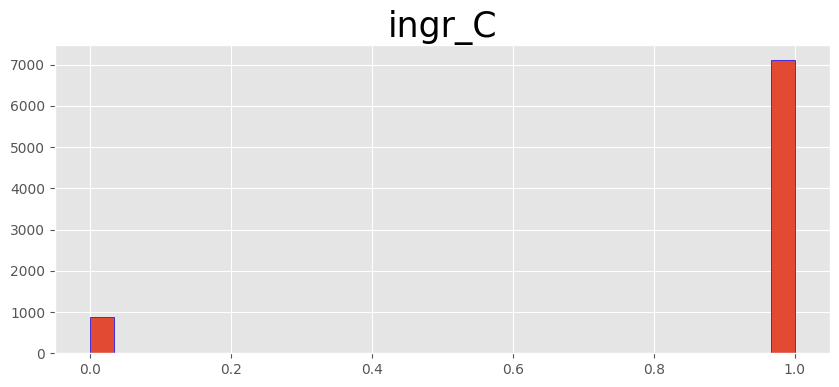

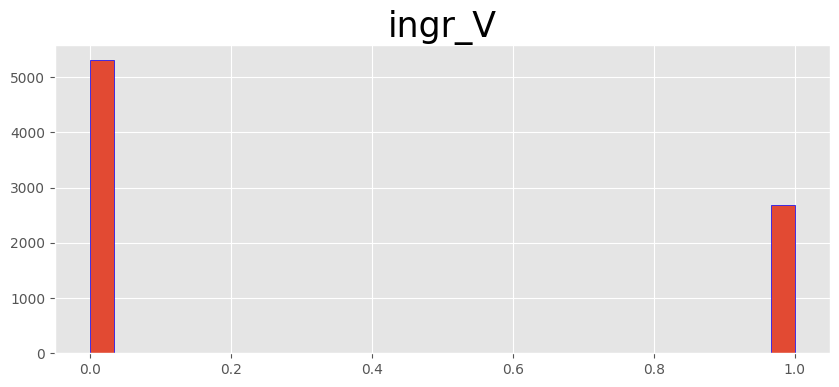

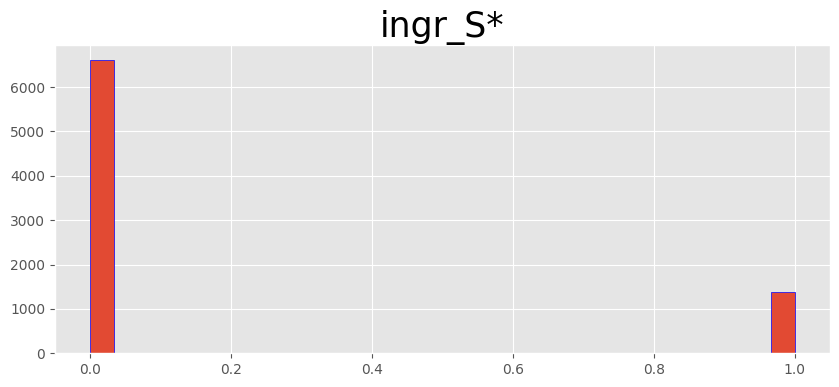

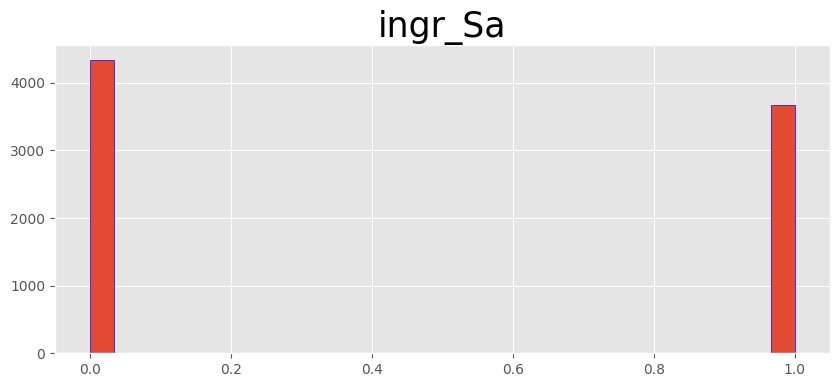

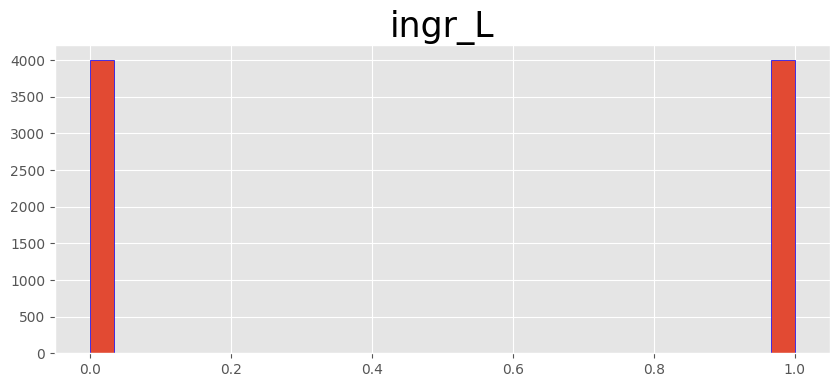

In [45]:
# This function plots a histogram
def desc_num_feature(numerical_features):
  feature_name=numerical_features
  fig, ax = plt.subplots(figsize=(10,4))
  df3_ros[feature_name].hist(bins=30, edgecolor="b")
  ax.set_title(feature_name, size=25)
  print('Forma del conjunto: ',feature_name," :" ,Counter(df3_ros[feature_name]))
  df[feature_name].describe().round(2)

  # This loop will plot each of the numerical features using the previous function
for x in df3_ros.columns:
  desc_num_feature(x)

In [46]:
X=df3_ros.drop(["Rating"], axis = 1)
y=df3_ros["Rating"]

Dividimos los datos en conjuntos de prueba y entrenamiento

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Escalado / Normalización de Datos

In [48]:
rs = RobustScaler()
#scaling the training set
X_train = rs.fit_transform(X_train)
#scaling the test set
X_test = rs.transform (X_test)

## **B. Modelos de Regresión o Clasificación**

Se escoge la predicción por regresión dado que la variable objetivo es de tipo continua.

## **C. Escenario de modelos**

Algoritmos seleccionados:

Regresión Lineal

Random Forest

Support Vector Machine

KNN

Árbol de Decisión

## **D. Construcción de modelos**

### Regresión Lineal

In [49]:
# Llamamos al objeto
lin_reg = LinearRegression()

# Entrenamos al modelos
lin_reg.fit(X_train, y_train)

# Haciendo predicciones
y_pred_lin_reg=lin_reg.predict(X_test)

In [50]:
#Evaluación de métricas
mae_lreg=metrics.mean_absolute_error(y_test, y_pred_lin_reg)
mse_lreg=metrics.mean_squared_error(y_test, y_pred_lin_reg)
rmse_lreg=np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin_reg))
r2_score_lreg=r2_score(y_test, y_pred_lin_reg)
print ("Mean Absolute Error:" , mae_lreg)
print ("Mean Squared Error:" ,mse_lreg )
print ("Root Mean Squared Error:" , rmse_lreg)
print('Coefficient of determination: %.2f'% r2_score_lreg)

Mean Absolute Error: 0.3257676977809467
Mean Squared Error: 0.17936646166352851
Root Mean Squared Error: 0.42351677849115793
Coefficient of determination: 0.07


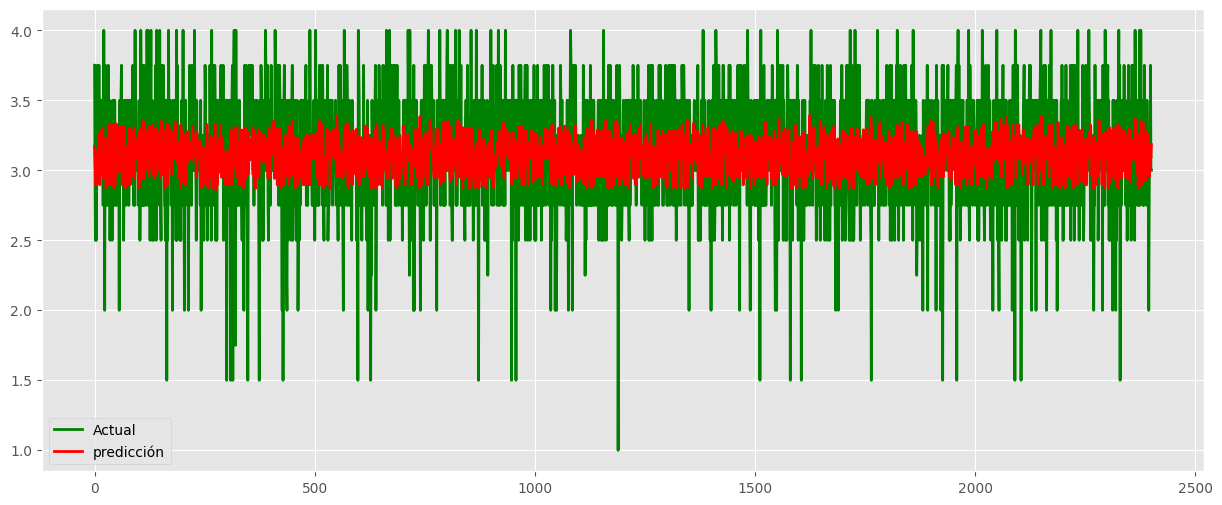

In [51]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="g", label="Actual", linewidth=2)
plt.plot(y_pred_lin_reg, c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

### Random Forest Regressor

In [52]:
#cargamos la función
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)#500 árboles

#Entrenamos el modelo
regressor = rf_reg.fit(X_train, y_train)

#Hacemos las predicciones
y_pred_rf = regressor.predict(X_test)

In [53]:
# Cálculo de Métricas
mae_rf=metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf=metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf=np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_score_rf=r2_score(y_test, y_pred_rf)
print ("Mean Absolute Error:" , mae_rf)
print ("Mean Squared Error:" ,mse_rf )
print ("Root Mean Squared Error:" , rmse_rf)
print('Coefficient of determination: %.2f'% r2_score_rf)

Mean Absolute Error: 0.13120227795730946
Mean Squared Error: 0.07221957088797253
Root Mean Squared Error: 0.2687369920349123
Coefficient of determination: 0.63


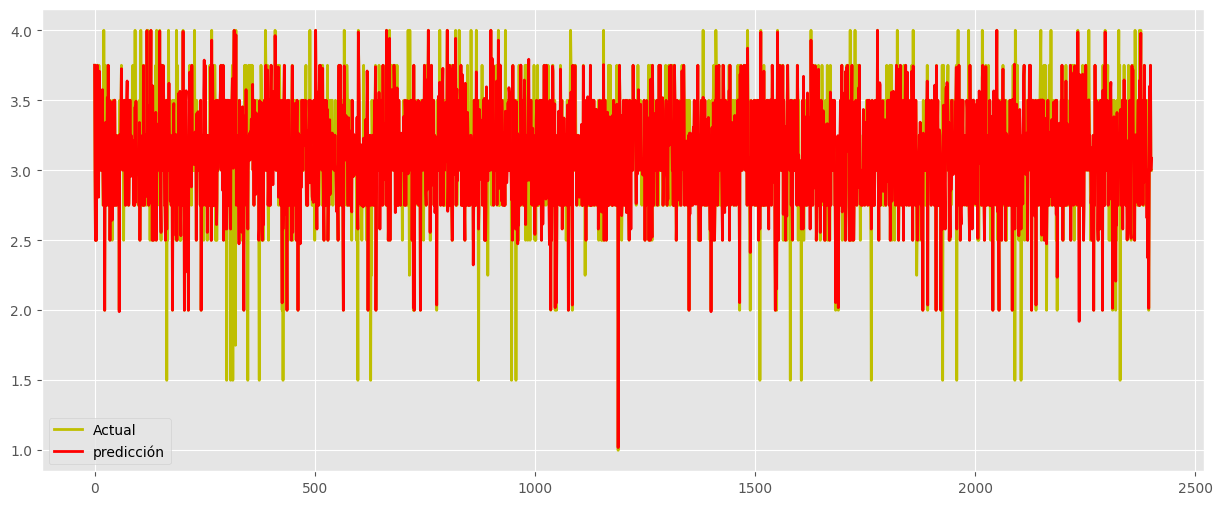

In [54]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="y", label="Actual", linewidth=2)
plt.plot(y_pred_rf, c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

### Support Vector Machine

In [55]:
# Llamando al objeto
svm_reg = svm.SVR()

# Entrenando nuestro modelo
regressor = svm_reg.fit(X_train, y_train)

# Haciendo la predicciones
y_pred_svr = regressor.predict(X_test)

In [56]:
# Cálculo de Métricas
mae_svr=metrics.mean_absolute_error(y_test, y_pred_svr)
mse_svr=metrics.mean_squared_error(y_test, y_pred_svr)
rmse_svr=np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr))
r2_score_svr=r2_score(y_test, y_pred_svr)
print ("Mean Absolute Error:" , mae_svr)
print ("Mean Squared Error:" ,mse_svr )
print ("Root Mean Squared Error:" , rmse_svr)
print('Coefficient of determination: %.2f'% r2_score_svr)

Mean Absolute Error: 0.24912771886158386
Mean Squared Error: 0.13130593462931195
Root Mean Squared Error: 0.3623616075542661
Coefficient of determination: 0.32


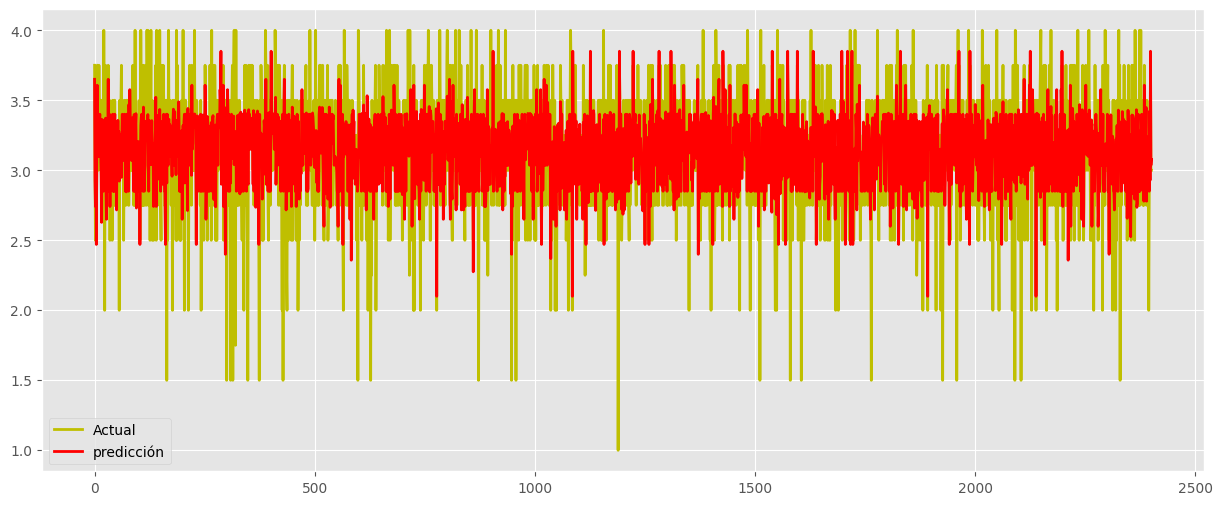

In [57]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="y", label="Actual", linewidth=2)
plt.plot(y_pred_svr, c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

### KNN

In [58]:
#llamo al objeto o a la función
KNN_reg = KNeighborsRegressor(n_neighbors=5)
# Entrenamiento de lo modelo
regressor = KNN_reg.fit(X_train, y_train)
#Predición de modelo
y_pred_knn = regressor.predict(X_test)

In [59]:
# Evaluación de Métricas
mae_knn=metrics.mean_absolute_error(y_test, y_pred_knn)
mse_knn=metrics.mean_squared_error(y_test, y_pred_knn)
rmse_knn=np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn))
r2_score_knn=r2_score(y_test, y_pred_knn)
print ("Mean Absolute Error:" , mae_knn)
print ("Mean Squared Error:" ,mse_knn )
print ("Root Mean Squared Error:" , rmse_knn)
print('Coefficient of determination: %.2f'% r2_score_knn)

Mean Absolute Error: 0.15630987088713036
Mean Squared Error: 0.08610995418575594
Root Mean Squared Error: 0.29344497641935524
Coefficient of determination: 0.56


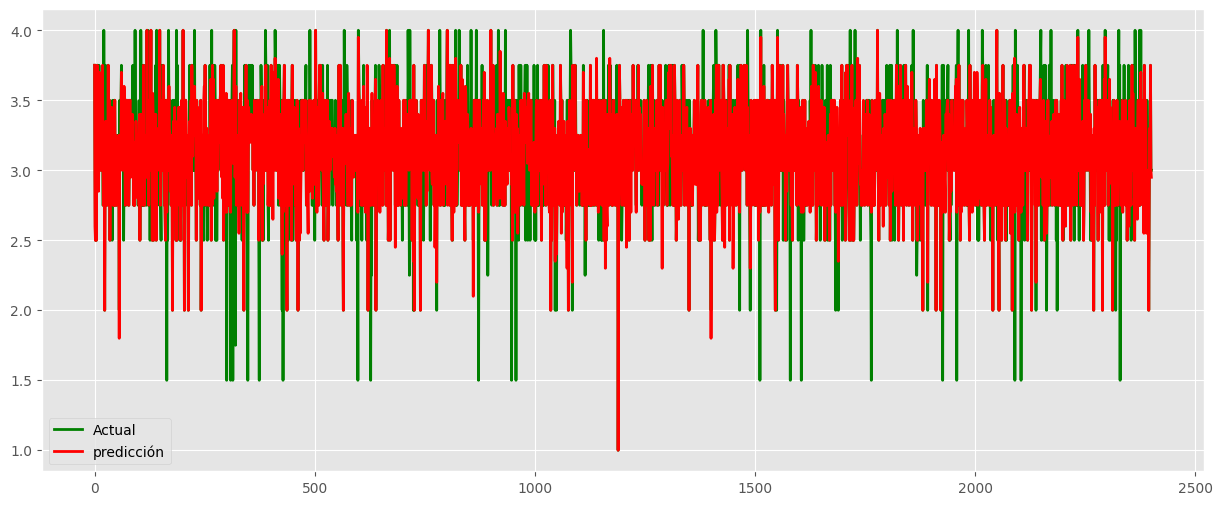

In [60]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="g", label="Actual", linewidth=2)
plt.plot(y_pred_knn, c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

### Árbol de decisión

In [61]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth = 10, min_samples_leaf = 2).fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

In [62]:
# Evaluación de métricas
mae_dtr=metrics.mean_absolute_error(y_test, y_pred_dtr)
mse_dtr=metrics.mean_squared_error(y_test, y_pred_dtr)
rmse_dtr=np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtr))
r2_score_dtr=r2_score(y_test, y_pred_dtr)
print ("Mean Absolute Error:" , mae_dtr)
print ("Mean Squared Error:" ,mse_dtr )
print ("Root Mean Squared Error:" , rmse_dtr)
print('Coefficient of determination: %.2f'% r2_score_dtr)

Mean Absolute Error: 0.174232323880036
Mean Squared Error: 0.09662617297755025
Root Mean Squared Error: 0.3108475075942386
Coefficient of determination: 0.50


## **F. Evaluación de modelos**

In [63]:
modelos = pd.DataFrame({
    'Model': ["Regresión Lineal","Random Forest Regressor","Support Vector Machine","KNN","Árbol de Desición"] ,
     "R2":[r2_score_lreg*100 ,r2_score_rf*100 ,r2_score_svr*100 ,r2_score_knn*100, r2_score_dtr*100],
     "RMSE":[rmse_lreg , rmse_rf , rmse_svr, rmse_knn, rmse_dtr ]   })

modelos

,Model,R2,RMSE
0,Regresión Lineal,7.420368,0.423517
1,Random Forest Regressor,62.724016,0.268737
2,Support Vector Machine,32.226711,0.362362
3,KNN,55.554523,0.293445
4,Árbol de Desición,50.126599,0.310848


In [64]:
fig = px.bar (modelos, x="Model",
                   y="R2",
                       template = "plotly_dark",
                   color_discrete_sequence=['lime', 'blue'],
                   title='R2')
fig.update_layout(bargap=0.6)
fig.show();

In [65]:
fig = px.bar (modelos, x="Model",
                   y="RMSE",
                       template = "plotly_dark",
                   color_discrete_sequence=[ 'blue'],
                   title='RMSE')
fig.update_layout(bargap=0.6)
fig.show();

Elegimos el modelo : Random Forest Regressor

In [66]:
# Se usará el método Random Forest

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#param_grid = {
#    'bootstrap': [True],
#    'max_depth': [80, 90, 100, 110],
#    'max_features': [2, 3],
#    'min_samples_leaf': [3, 4, 5],
#    'min_samples_split': [8, 10, 12],
#    'n_estimators': [100, 200, 300, 1000],
#    'criterion': ['mse', "r2"]       }

clf = RandomForestRegressor()
model = RandomizedSearchCV(estimator = clf, param_distributions = param_grid, n_iter = 20, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=101, verbose=1)

In [67]:
print(f'Best parameters {model.best_params_}')

Best parameters {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}


In [68]:
clf2=RandomForestRegressor(criterion='friedman_mse', max_depth=30, max_features='sqrt',
                      min_samples_leaf=1, min_samples_split=5,
                      n_estimators=800, bootstrap=False)
clf2.fit(X_train, y_train)
#Hacemos las predicciones
y_pred_hyper = clf2.predict(X_test)

In [69]:
# Cálculo de Métricas
mae_hyper=metrics.mean_absolute_error(y_test, y_pred_hyper)
mse_hyper=metrics.mean_squared_error(y_test, y_pred_hyper)
rmse_hyper=np.sqrt(metrics.mean_squared_error(y_test, y_pred_hyper))
r2_score_hyper=r2_score(y_test, y_pred_hyper)
print ("Mean Absolute Error:" , mae_hyper)
print ("Mean Squared Error:" ,mse_hyper)
print ("Root Mean Squared Error:" , rmse_hyper)
print('Coefficient of determination: %.2f'% r2_score_hyper)

Mean Absolute Error: 0.12422428128799391
Mean Squared Error: 0.06995163997774395
Root Mean Squared Error: 0.26448372346468496
Coefficient of determination: 0.64


# **G. Análisis PCA**

In [70]:
# Preprocesamiento
X_train_sc=pd.DataFrame(X_train, columns=X.columns)
X_test_sc=pd.DataFrame(X_test, columns=X.columns)

In [71]:
# Aplicando PCA PARA REDUCCIÓN DE DIMENSIONALIDAD......
# Llamar al modelo n_componets=None
pca = PCA(n_components = None)

X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [72]:
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[2.45642254e-01 2.01882201e-01 1.70006874e-01 1.44627251e-01
 1.19246554e-01 5.50487771e-02 3.54829865e-02 2.78452747e-02
 2.17828442e-04]


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[2.45642254e-01 2.01882201e-01 1.70006874e-01 1.44627251e-01
 1.19246554e-01 5.50487771e-02 3.54829865e-02 2.78452747e-02
 2.17828442e-04]


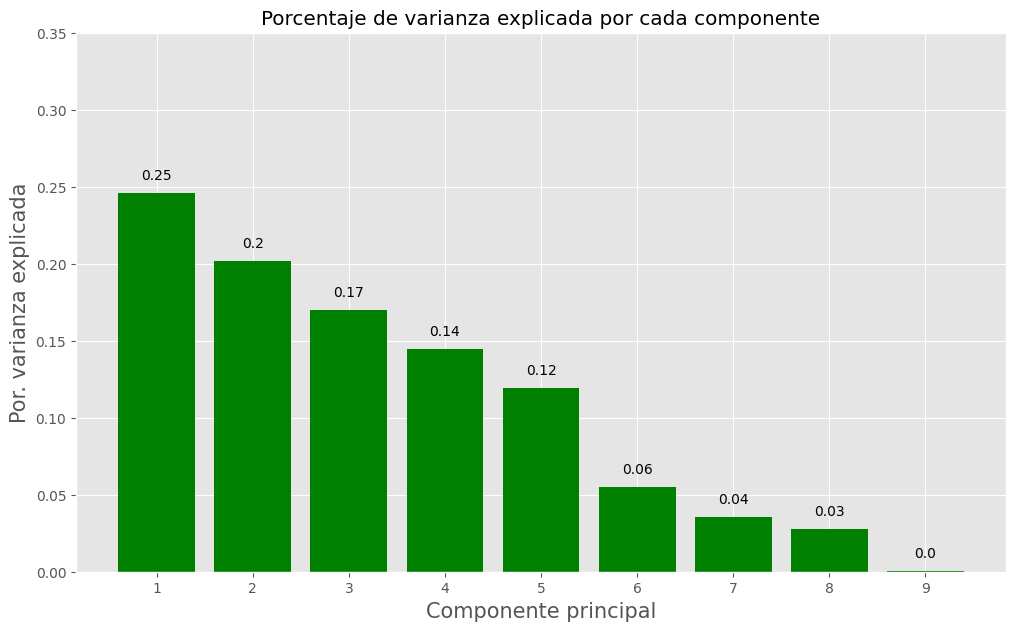

In [73]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax.bar(x  = np.arange(pca.n_components_) + 1,color="green",
    height = pca.explained_variance_ratio_,)

for x, y in zip(np.arange(len(X.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center')
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 0.35)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal', size=15)
ax.set_ylabel('Por. varianza explicada', size=15);
fig.show()

La primera componente explica el 35% de la varianza observada en los datos, la segunda el 22%, la tercera el 13%, la cuarta 8% y la quinta 6%, la sexta el 5%.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.24564225 0.44752445 0.61753133 0.76215858 0.88140513 0.93645391
 0.9719369  0.99978217 1.        ]


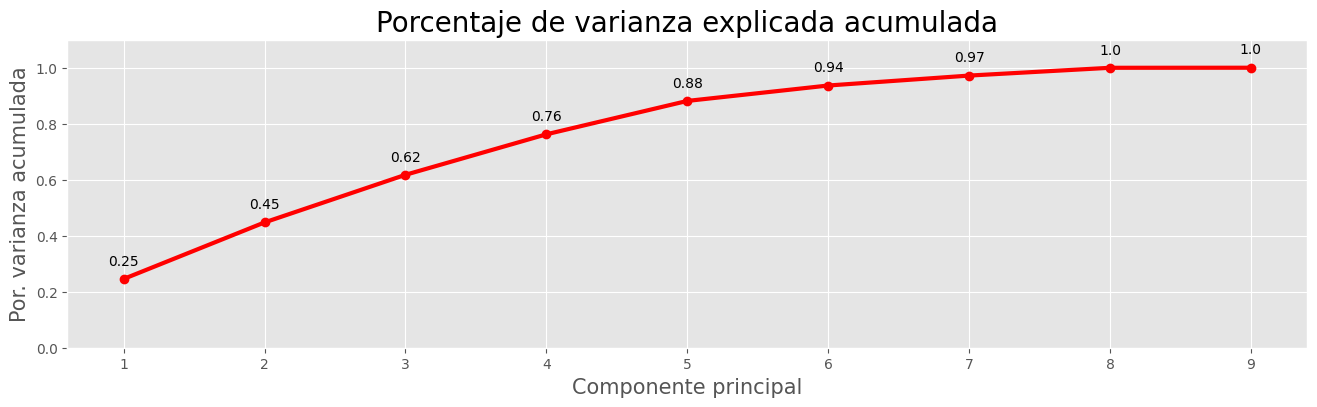

In [74]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
ax.plot(np.arange(len(X.columns)) + 1,
    prop_varianza_acum, marker = 'o', lw=3, color="red")

for x, y in zip(np.arange(len(X.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,(x,y),
        textcoords="offset points",
        xytext=(0,10),ha='center')

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada', size=20)
ax.set_xlabel('Componente principal', size=15)
ax.set_ylabel('Por. varianza acumulada', size=15);

Seleccionamos las 6 componentes principales

In [75]:
pca = PCA(n_components = 6)
X_train_PCA2 = pca.fit_transform(X_train_sc)
X_test_PCA2 = pca.transform(X_test_sc)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.24564225 0.2018822  0.17000687 0.14462725 0.11924655 0.05504878]


In [76]:
pca.explained_variance_ratio_.sum()

0.9364539103644586